1. Connect to h2o
2. ETL data for model
3. 

# 1. Connect to H2o

In [1]:
import h2o

In [2]:
# Define the URL to the h2o server/cluster
ip = "127.0.0.1"
port = 54321
url = "http://{0}:{1}".format(ip, port)
print(url)

http://127.0.0.1:54321


In [3]:
h2o.init(url=url)

Checking whether there is an H2O instance running at http://127.0.0.1:54321 . connected.


H2O_cluster_uptime:,15 mins 36 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,14 days and 9 minutes
H2O_cluster_name:,Administrator
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.475 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


# 2. ETL the data

In [26]:
# Import libraries to manipulate data
import pandas
import numpy 
import matplotlib.pyplot as pyplot

In [28]:
# Import the utilities module we wrote
import importlib.util
spec = importlib.util.spec_from_file_location("utilities", "../Utilities/utilities.py")
utilities = importlib.util.module_from_spec(spec)
spec.loader.exec_module(utilities)

In [35]:
# Import the data
# https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-munging/importing-data.html
h2o_frame = h2o.import_file(path="../nasdaq_2019.csv")
h2o_frame

Parse progress: |█████████████████████████████████████████████████████████| 100%


ticker,interval,date,open,high,low,close,volume
AABA,D,2019-07-01 00:00:00,70.9,71.52,70.325,70.57,1.02348e+07
AAL,D,2019-07-01 00:00:00,33.14,33.6632,32.5301,32.88,8.9951e+06
AAME,D,2019-07-01 00:00:00,2.43,2.43,2.4,2.4,500
AAOI,D,2019-07-01 00:00:00,10.7,10.89,10.01,10.18,883100
AAON,D,2019-07-01 00:00:00,50.57,50.985,48.56,49.73,180200
AAPL,D,2019-07-01 00:00:00,203.17,204.49,200.65,201.55,2.73167e+07
AAWW,D,2019-07-01 00:00:00,45.27,45.985,43.81,44.03,348900
AAXJ,D,2019-07-01 00:00:00,71.05,71.225,70.48,70.74,830100
AAXN,D,2019-07-01 00:00:00,65.22,65.9,63.4,64.55,1.3153e+06
ABCB,D,2019-07-01 00:00:00,39.1,40.03,37.95,39.8,2.5894e+06


In [60]:
# Filter the column based on the ticker
mask = h2o_frame["ticker"] == "AABA"
h2o_frame = h2o_frame[mask, :]
h2o_frame.dim

[158, 8]

In [74]:
# Filter the column based on the date
import datetime
mask = h2o_frame["date"] > datetime.datetime(2019,8,1)
h2o_frame = h2o_frame[mask, :]
h2o_frame.dim

[6, 2]

In [75]:
h2o_frame

date,open
2019-08-02 00:00:00,69.8
2019-08-05 00:00:00,69.5
2019-08-06 00:00:00,69.85
2019-08-07 00:00:00,69.54
2019-08-08 00:00:00,70.15
2019-08-09 00:00:00,69.67


In [76]:
# Select certain columns from the dataframe
# https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-munging/slicing-columns.html
h2o_frame = h2o_frame[:, ["date", "open"]]
h2o_frame

date,open
2019-08-02 00:00:00,69.8
2019-08-05 00:00:00,69.5
2019-08-06 00:00:00,69.85
2019-08-07 00:00:00,69.54
2019-08-08 00:00:00,70.15
2019-08-09 00:00:00,69.67


In [77]:
pandas_frame = h2o.as_list(h2o_frame)
pandas_frame.head()

,date,open
0,1564704000000,69.80
1,1564963200000,69.50
2,1565049600000,69.85
3,1565136000000,69.54
4,1565222400000,70.15


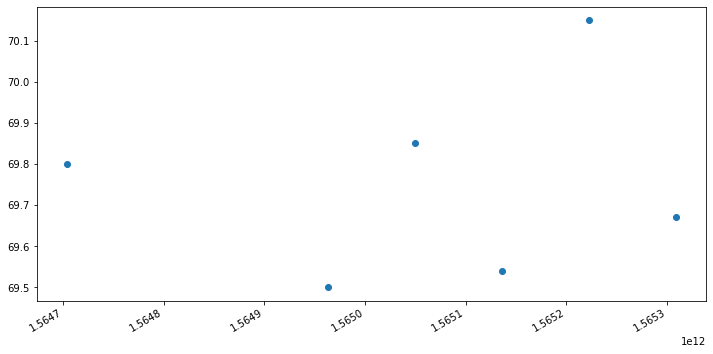

In [78]:
figure, axis = utilities.plot_dataframe(pandas_frame, "date", "open")

# Generalize Linear Model

Generalized Linear Models (GLM) estimate regression models for outcomes following exponential distributions. In addition to the Gaussian (i.e. normal) distribution, these include Poisson, binomial, and gamma distributions. Each serves a different purpose, and depending on distribution and link function choice, can be used either for prediction or classification.

The GLM suite includes:
- Gaussian regression
- Poisson regression
- Binomial regression (classification)
- Fractional binomial regression
- Quasibinomial regression
- Multinomial classification
- Gamma regression
- Ordinal regression
- Negative Binomial regression
- Tweedie distribution

## Classification and Regression
GLM can produce two categories of models: classification and regression. Logistic regression is the GLM performing binary classification.

https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html

In [12]:
predictors = ["date", "open", "high", "low"]
response = "close"

In [18]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
glm_model = H2OGeneralizedLinearEstimator(family= "gaussian",
                                          lambda_ = 0,
                                          compute_p_values = True)

In [19]:
glm_model.train(predictors, response, training_frame=h2o_frame)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [21]:
# Coefficients that can be applied to the non-standardized data.
glm_model.coef()

{'Intercept': 2.4762247988003807,
 'date': -1.5800674525069808e-12,
 'open': -0.3980924915250341,
 'high': 0.5622297185186862,
 'low': 0.8390946552483034}

In [22]:
# Coefficients fitted on the standardized data (requires standardize = True, which is on by default)
glm_model.coef_norm()

{'Intercept': 31.521921673273393,
 'date': -0.008726704242020156,
 'open': -27.828642252735296,
 'high': 39.693132624116195,
 'low': 58.10382616118259}

In [23]:
# Print the Coefficients table
glm_model._model_json['output']['coefficients_table']


Coefficients: glm coefficients


,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,2.476225e+00,2.311220e-01,10.713929,8.813864e-27,31.521922
1,date,-1.580067e-12,1.485523e-13,-10.636439,2.029738e-26,-0.008727
2,open,-3.980925e-01,1.174590e-03,-338.920280,0.000000e+00,-27.828642
3,high,5.622297e-01,7.607088e-04,739.086633,0.000000e+00,39.693133
4,low,8.390947e-01,9.309314e-04,901.349582,0.000000e+00,58.103826


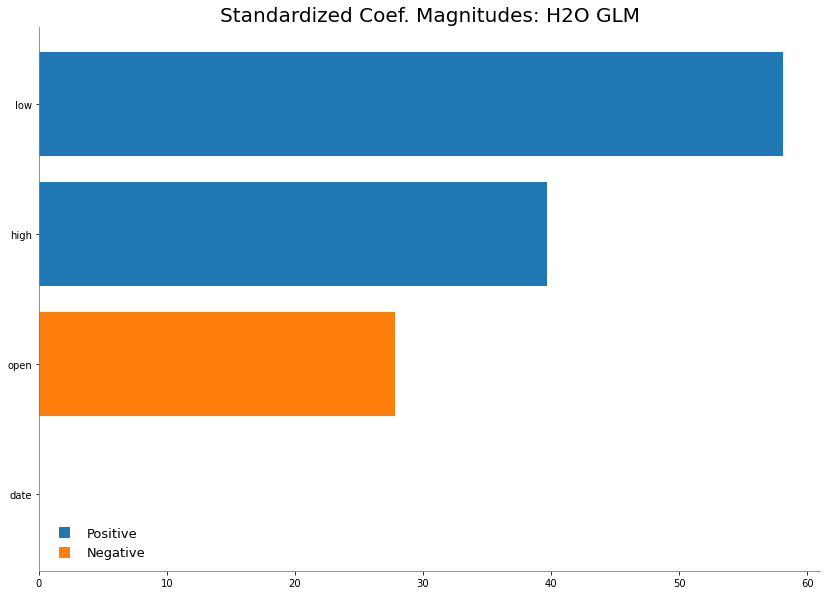

In [24]:
# Retrieve a graphical plot of the standardized coefficient magnitudes
glm_model.std_coef_plot()

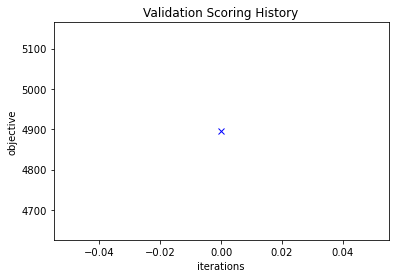

In [25]:
glm_model.plot()